In [5]:
!python --version

Python 3.6.12 :: Anaconda, Inc.


In [6]:
conda install -c conda-forge matplotlib 

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [154]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
%matplotlib inline

In [155]:
import os

In [156]:
os.listdir('Desktop/Dersler/rasterio deneme')

['.ipynb_checkpoints',
 'Change Detection_cengiz.ipynb',
 'gemliksubset_band2.tif',
 'gemliksubset_band4.tif',
 'gemlık_band1.tif',
 'gemlık_band2.tif',
 'gemlık_band2_yeni.tif',
 'gemlık_band3.tif',
 'gemlık_band4.tif',
 'gemlık_band4_yeni.tif',
 'gemlık_tiff.tif',
 'izmit.tif',
 'linkler.docx',
 'Output',
 'sample.tif',
 'sentinel_band2.tif',
 'sentinel_band3.tif',
 'sentinel_band4.tif',
 'sentinel_band8.tif',
 'sentinel_rgb.tif',
 'subset5_sentinel_rgb.tif',
 'subset_gemlik.data']

In [157]:
sentinel_rgb = rasterio.open('Desktop/Dersler/rasterio deneme/subset5_sentinel_rgb.tif') #RGB Bands

In [158]:
# define constants
figure_border = 25
epsilon = 0.0001
max_y = 5000
max_steps = 500
square_side = 20
threshold_for_ndwi = 0.2
threshold_for_ship = 2

In [159]:
sentinel_rgb.bounds

BoundingBox(left=705880.0, bottom=4498630.0, right=731790.0, top=4519360.0)

In [160]:
sentinel_rgb.crs

CRS.from_epsg(32635)

In [161]:
sentinel_rgb.transform

Affine(10.0, 0.0, 705880.0,
       0.0, -10.0, 4519360.0)

In [162]:
sentinel_rgb.indexes

(1, 2, 3, 4)

In [163]:
sentinel_rgb.read(3)

array([[1234,  944, 1098, ...,  486,  438,  397],
       [ 938, 1888, 1500, ...,  399,  523,  517],
       [1844, 1896, 1636, ...,  302,  382,  552],
       ...,
       [ 626,  681,  550, ...,  362,  425,  476],
       [ 503,  577,  540, ...,  346,  383,  418],
       [ 498,  604,  558, ...,  318,  324,  301]], dtype=uint16)

In [164]:
img = sentinel_rgb.read(3)

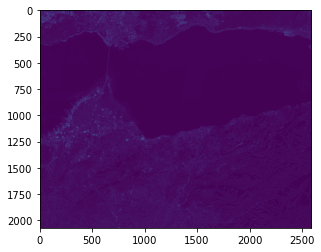

<AxesSubplot:>

In [165]:
show(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


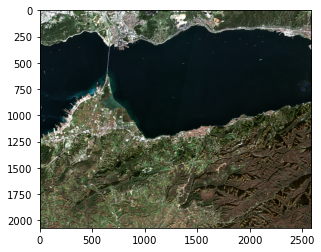

<AxesSubplot:>

In [166]:
#producing RGB map with sentinel image
from rasterio.plot import show, adjust_band
imgdata = np.array([adjust_band(sentinel_rgb.read(i)) for i in (4,3,2)])
show(imgdata*10)  # factor 10 to increase brightness

In [ ]:
#NDWI Bands green and NIR
band3 = rasterio.open('Desktop/Dersler/rasterio deneme/sentinel_band3.tif') #green

In [ ]:
band8 = rasterio.open('Desktop/Dersler/rasterio deneme/sentinel_band8.tif') #NIR

In [213]:
band3.height
band3.width
band3.crs
band3.transform

Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)

In [214]:
band8.height
band8.width
band8.crs
band8.transform

Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)

In [215]:
band3.read(1)
band8.read(1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [170]:
plot.show(band3)

Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)

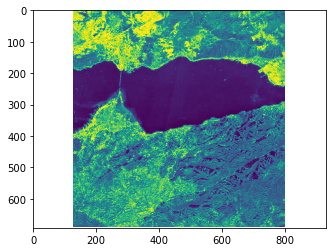

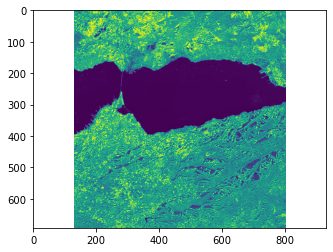

<AxesSubplot:>

In [216]:
plot.show(band3)
plot.show(band8)

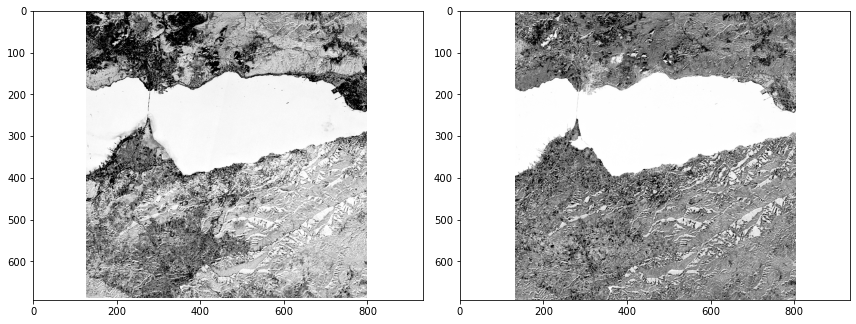

In [217]:
#multiple band representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band3, ax=ax1, cmap='Greys') #green
plot.show(band8, ax=ax2, cmap='Greys') #nir
fig.tight_layout()

In [218]:
green = band3.read(1).astype('float64')
nir = band8.read(1).astype('float64')

In [175]:
#NDWI calculation, 5 for eliminating the 0 value of equation
ndwi=((nir-green-5)/(nir+green+5))

In [178]:
#export NDWI image
ndwiImage = rasterio.open('Desktop/sentinel_output_ndwi.tif','w',driver='Gtiff',
                          width=band8.width, 
                          height = band8.height, 
                          count=1, crs=band8.crs, 
                          transform=band8.transform,
                         dtype='float64')
ndwiImage.write(ndwi,1)
ndwiImage.close()

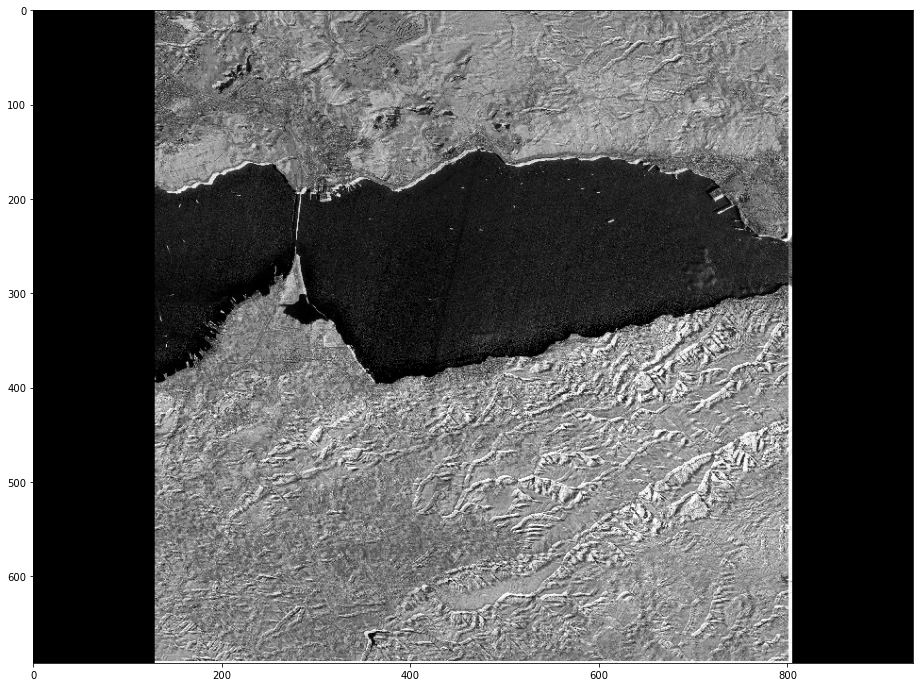

<AxesSubplot:>

In [179]:
#plot NDWI
ndwiImage = rasterio.open('Desktop/sentinel_output_ndwi.tif') 
fig = plt.figure(figsize=(18,12))
plot.show(ndwiImage, cmap='gray')

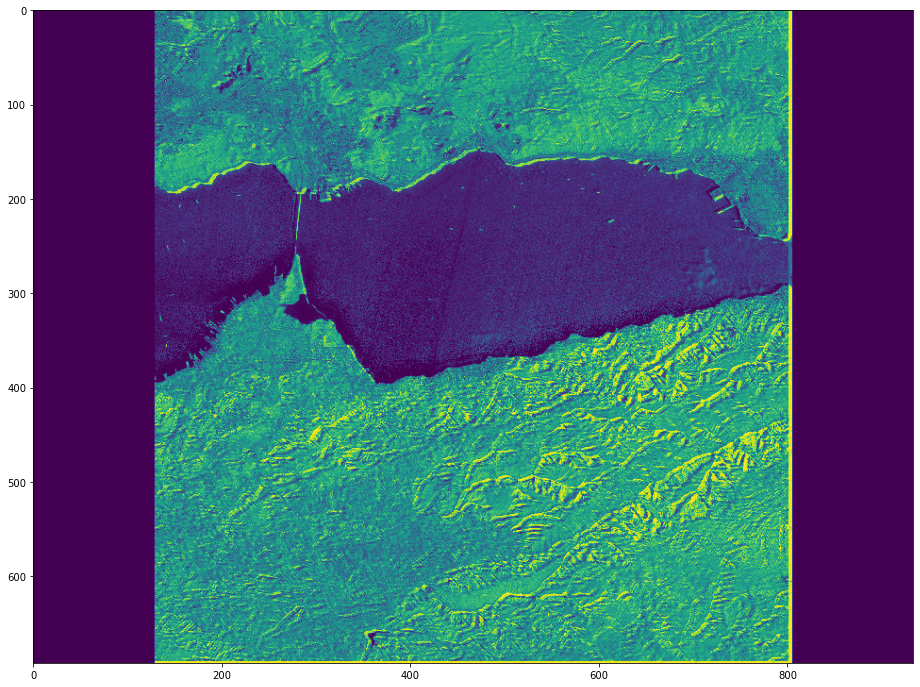

<AxesSubplot:>

In [210]:
#plot NDWI
ndwi2 = rasterio.open('Desktop/sentinel_output_ndwi.tif')
fig = plt.figure(figsize=(18,12))
plot.show(ndwi)

In [223]:
array_t1 = ndwi.ReadAsArray()[0:, 0:].astype(float)

AttributeError: 'DatasetReader' object has no attribute 'ReadAsArray'

In [ ]:
# create figure to display original ndtidif= NDTI difference
output_fig, (histogram_ax) = plt.subplots(figsize=(10, 3))
histogram_ax.hist(array_ndwi.ravel(), bins=200, range=(-1.0, 1.0))
histogram_ax.grid(b=True, color='gray', linestyle='--', linewidth=0.5);
plt.show()